In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, Input, BatchNormalization
# from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam
# import prepare_data as pd
import numpy
import math

import cv2

In [2]:
srcnn_model.load_weights('/Users/vladimirrevar/Downloads/final-srcnn/3051crop_weight_200.h5')

NameError: name 'srcnn_model' is not defined

In [ ]:
import cv2

In [ ]:
IMG_NAME = '/Users/vladimirrevar/Downloads/SRCNN-keras-master/Test/Test04ea43044.jpg'
INPUT_NAME = "Test04ea43044.jpg"
OUTPUT_NAME = "pre2.jpg"

In [ ]:
img = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
shape = img.shape
Y_img = cv2.resize(img[:, :, 0], (int(shape[1] / 2), int(shape[0] / 2)), cv2.INTER_CUBIC)
Y_img = cv2.resize(Y_img, (shape[1], shape[0]), cv2.INTER_CUBIC)
img[:, :, 0] = Y_img
img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
cv2.imwrite(INPUT_NAME, img)
cv2.imwrite('pre1.jpg',img)

In [ ]:
Y = numpy.zeros((1, img.shape[0], img.shape[1], 1), dtype=float)
Y[0, :, :, 0] = Y_img.astype(float) / 255.
pre = srcnn_model.predict(Y, batch_size=1) * 255.
pre[pre[:] > 255] = 255
pre[pre[:] < 0] = 0
pre = pre.astype(numpy.uint8)
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
img[6: -6, 6: -6, 0] = pre[0, :, :, 0]
img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
cv2.imwrite(OUTPUT_NAME, img)

In [ ]:
im1 = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2YCrCb)[6: -6, 6: -6, 0]
im2 = cv2.imread(INPUT_NAME, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2YCrCb)[6: -6, 6: -6, 0]
im3 = cv2.imread(OUTPUT_NAME, cv2.IMREAD_COLOR)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2YCrCb)[6: -6, 6: -6, 0]

print("bicubic:")
print(cv2.PSNR(im1, im2))
print("SRCNN:")
print(cv2.PSNR(im1, im3))

In [ ]:
cv2.imshow(OUTPUT_NAME)

In [ ]:
def pred(IMG_NAME,INPUT_NAME, OUTPUT_NAME):
    img = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    
    shape = img.shape
    Y_img = cv2.resize(img[:, :, 0], (int(shape[1] / 2), int(shape[0] / 2)), cv2.INTER_CUBIC)
    Y_img = cv2.resize(Y_img, (shape[1], shape[0]), cv2.INTER_CUBIC)
    img[:, :, 0] = Y_img
    img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
    img1 = img
    cv2.imwrite(INPUT_NAME, img)
    cv2.imwrite('pre1.jpg',img)
    Y = numpy.zeros((1, img.shape[0], img.shape[1], 1), dtype=float)
    Y[0, :, :, 0] = Y_img.astype(float) / 255.
    pre = srcnn_model.predict(Y, batch_size=1) * 255.
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    pre = pre.astype(numpy.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    img[6: -6, 6: -6, 0] = pre[0, :, :, 0]
    img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
    cv2.imwrite(OUTPUT_NAME, img)
    im1 = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
    im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2YCrCb)[6: -6, 6: -6, 0]
    im2 = cv2.imread(INPUT_NAME, cv2.IMREAD_COLOR)
    im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2YCrCb)[6: -6, 6: -6, 0]
    im3 = cv2.imread(OUTPUT_NAME, cv2.IMREAD_COLOR)
    im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2YCrCb)[6: -6, 6: -6, 0]

    print("bicubic:")
    print(cv2.PSNR(im1, im2))
    print("SRCNN:")
    print(cv2.PSNR(im1, im3))
    return img, img1

In [3]:
a,b = pred(IMG_NAME, INPUT_NAME, OUTPUT_NAME)

NameError: name 'pred' is not defined

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.figure(figsize = (10,10))
plt.imshow(a)

NameError: name 'a' is not defined

<Figure size 720x720 with 0 Axes>

In [6]:
plt.figure(figsize = (10,10))
plt.imshow(b)

NameError: name 'b' is not defined

<Figure size 720x720 with 0 Axes>

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, Input, BatchNormalization
# from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam
import prepare_data as pd
import numpy
import math


def psnr(target, ref):
    # assume RGB image
    target_data = numpy.array(target, dtype=float)
    ref_data = numpy.array(ref, dtype=float)

    diff = ref_data - target_data
    diff = diff.flatten('C')

    rmse = math.sqrt(numpy.mean(diff ** 2.))

    return 20 * math.log10(255. / rmse)


def model():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(32, 32, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=3, nb_col=3, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN


def predict_model():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=3, nb_col=3, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN


def train():
    srcnn_model = model()
    print(srcnn_model.summary())
    data, label = pd.read_training_data("./crop_train.h5")
    val_data, val_label = pd.read_training_data("./test.h5")

    checkpoint = ModelCheckpoint("SRCNN_check.h5", monitor='val_loss', verbose=1, save_best_only=True,
                                 save_weights_only=False, mode='min')
    callbacks_list = [checkpoint]

    srcnn_model.fit(data, label, batch_size=128, validation_data=(val_data, val_label),
                    callbacks=callbacks_list, shuffle=True, nb_epoch=300, verbose=0)
    # srcnn_model.load_weights("m_model_adam.h5")


def predict():
    srcnn_model = predict_model()
    srcnn_model.load_weights("/Users/vladimirrevar/Downloads/final-srcnn/3051crop_weight_200.h5")
    IMG_NAME = '/Users/vladimirrevar/Downloads/SRCNN-keras-master/Test/Test04ea43044.jpg'
    INPUT_NAME = "Test04ea43044.jpg"
    OUTPUT_NAME = "pre2.jpg"

    import cv2
    img = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    shape = img.shape
    Y_img = cv2.resize(img[:, :, 0], (int(shape[1] / 2), int(shape[0] / 2)), cv2.INTER_CUBIC)
    Y_img = cv2.resize(Y_img, (shape[1], shape[0]), cv2.INTER_CUBIC)
    img[:, :, 0] = Y_img
    img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
    cv2.imwrite(INPUT_NAME, img)

    Y = numpy.zeros((1, img.shape[0], img.shape[1], 1), dtype=float)
    Y[0, :, :, 0] = Y_img.astype(float) / 255.
    pre = srcnn_model.predict(Y, batch_size=1) * 255.
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    pre = pre.astype(numpy.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    img[6: -6, 6: -6, 0] = pre[0, :, :, 0]
    img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
    cv2.imwrite(OUTPUT_NAME, img)

    # psnr calculation:
    im1 = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
    im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2YCrCb)[6: -6, 6: -6, 0]
    im2 = cv2.imread(INPUT_NAME, cv2.IMREAD_COLOR)
    im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2YCrCb)[6: -6, 6: -6, 0]
    im3 = cv2.imread(OUTPUT_NAME, cv2.IMREAD_COLOR)
    im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2YCrCb)[6: -6, 6: -6, 0]

    print("bicubic:")
    print(cv2.PSNR(im1, im2))
    print("SRCNN:")
    print(cv2.PSNR(im1, im3))


# if __name__ == "__main__":
#     train()
predict()



/Users/vladimirrevar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/Users/vladimirrevar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(3, 3), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/Users/vladimirrevar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`


bicubic:
41.17542855722455
SRCNN:
44.766745988280874


In [8]:
img = cv2.imread('pre1.jpg')

NameError: name 'cv2' is not defined

In [ ]:
img.shape

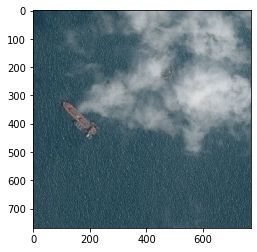

In [10]:
plt.imshow(plt.imread('/Users/vladimirrevar/Downloads/SRCNN-keras-master/Test/Test04ea43044.jpg'))

In [12]:
im12 = plt.imread("Test04ea43044.jpg")

In [11]:
im123 = plt.imread('/Users/vladimirrevar/Downloads/SRCNN-keras-master/Test/Test04ea43044.jpg')
plt.imsave('show_image.png', im123)

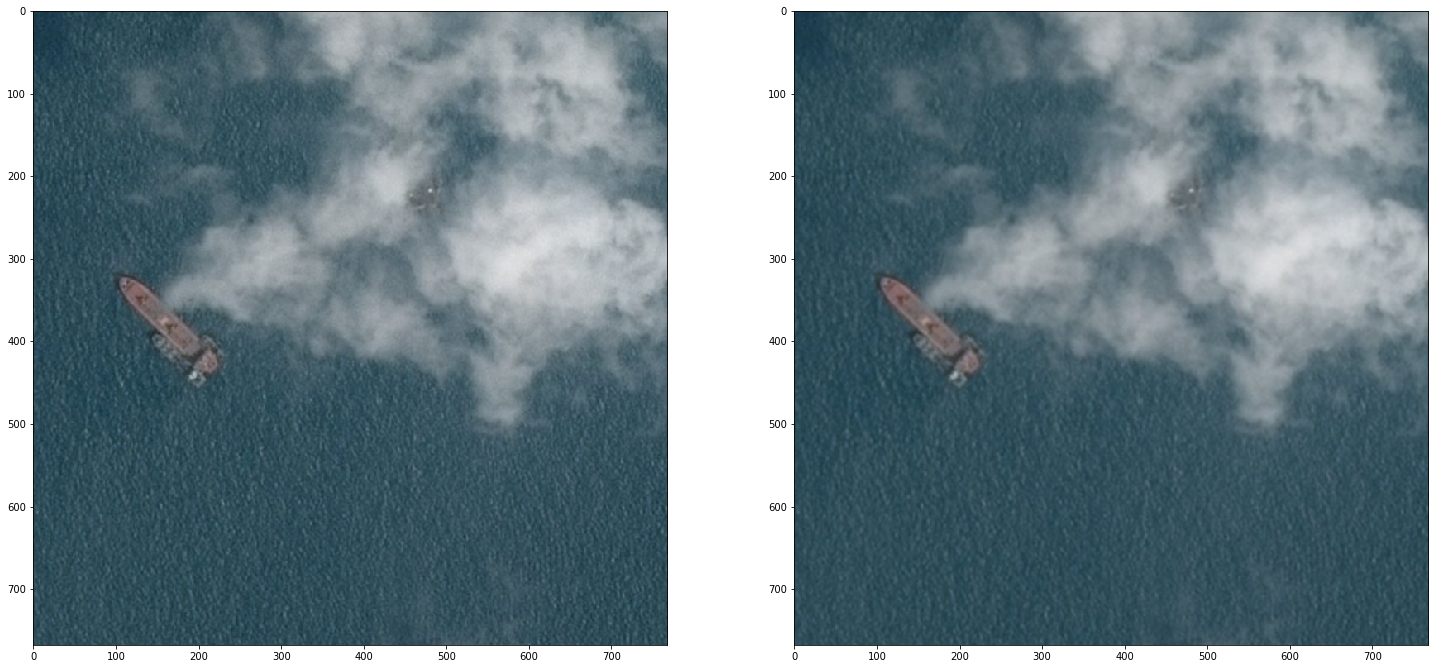

In [14]:
fig, (ax1,ax2) = plt.subplots(nrows = 1,ncols = 2,figsize=(25,25))
ax1.imshow(im123)
ax2.imshow(im12)

In [15]:
from sklearn.metrics import mean_squared_error as mse

In [16]:
mse(im123,im12)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [23]:
for i in [0,1,2]:
    print(mse(im123[:,:,i],im12[:,:,i]))


4.955276489257812
4.955257839626736
4.955844455295138
